In [136]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import scipy.stats as stats
import statsmodels.formula.api as smf
import scipy

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [137]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

data['TV Log'] = np.log(data['TV'])
data['Radio Log'] = np.log(data['Radio'] +0.1)
data['Newspaper Log'] = np.log(data['Newspaper'])
data['Radio sqr'] = data['Radio'] ** 2
a = data['Sales']
data['Salesnormalized'] = (a-min(a))/(max(a)-min(a))


# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV Log','Radio sqr','Newspaper Log']]
regr.fit(X, Y)

# Inspect the results.
print(min(data['Radio']))
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


0.0

Coefficients: 
 [[ 3.94541403  0.00410157 -0.16689891]]

Intercept: 
 [-7.0167206]

R-squared:
0.891621585896


NormaltestResult(statistic=0.73275361638582914, pvalue=0.69324153289956203)


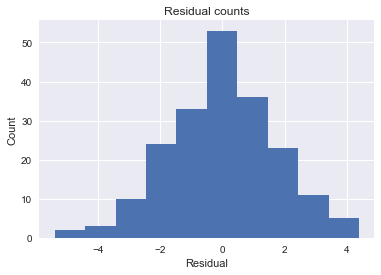

In [138]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']


# Calculate the error, also called the residual.
residual = actual - predicted

print(scipy.stats.mstats.normaltest(residual, axis=0))
# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


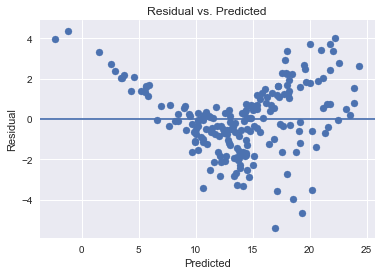

In [139]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [140]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV Log,Radio sqr,Newspaper Log
TV Log,1.000,-0.012,0.053
Radio sqr,-0.012,1.000,0.247
Newspaper Log,0.053,0.247,1.000
